## EE 461P: Data Science Principles  
### Assignment 1  
### Total points: 75
### Due: Tuesday, January 31, 2023, submitted via Canvas by 11:59 pm  

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s) and EID(s):
1. Mervan Can Kaya, mk45596
2. Jacob Dahlkvist, jad7543

# Question 1 (5 points)

Read [this](https://www.covid-datascience.com/post/israeli-data-how-can-efficacy-vs-severe-disease-be-strong-when-60-of-hospitalized-are-vaccinated) article that talks about the possibility of vaccines being uneffective in Israel since nearly 60% of severe COVID-19 hospitalization in Israel were vaccinated people. Use Simpson's Paradox to briefly explain if this claim holds true.


# Answer 1

# Question 2 (10 points)

100 students in the previous offering of this class were asked if they wanted to form their own groups for the course project or have the instructor randomize the groups. They reported their preferences by entering Yes or No in the survey. We use 0 to represent preferring their own groups and 1 to represent randomized groups. A random sample of 20 students yielded the following preferences:

$$1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1$$

These choices are assumed to arise by independent and identically distributed (i.i.d.) sampling from the following distribution and if the unknown parameter $q$ can be estimated, then we can provide more insights about the students' preference regrading the project groups.

$$
\begin{equation}
\nonumber P(x) = \left\{
\begin{array}{l l}
    q& \quad \text{for  } x=0\\
1-q & \quad \text{for } x=1
\end{array} \right.
\end{equation}
$$

Based on the definitions given above, identify the likelihood function and derive the **maximum likelihood estimator** of $q$. Using the given sample, find a maximum likelihood estimate of $q$ as well.

# Answer 2

# Question 3 (5+5 points)

a) Briefly explain what you understand by an estimator of a numeric quantity being unbiased? Show that the MLE for the variance of a Gaussian is biased.

b) Suppose the mean of the Gaussian distribution, $\mu$. So given a data set assumed to be obtained by sampling i.i.d from this Gaussian, your job is to obtain the MLE for the unknown variance. Derive the equation for this estimate and show that it is unbiased.

# Answer 3


# Question 4 (5+5 points)

a) What is multicollinearity in the context of linear regression and why is it problematic?

b) How do you diagnose and fix multicollinearity?


# Answer 4

# Question 5 : Regression (40 points)


### 5.1 Generate Data (5 points)
Generate a synthetic regression dataset using make_regression from [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) with the following characteristics :
n_samples = 20000, n_features = 20, n_informative = 15, n_targets = 1, coef = True and random_state = 42, bias = True, noise = 0.1.

**Reading Assignment** : Read about how this data is generated and the affect of the above mentioned parameters on the data. 

In [1]:
import sklearn.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt

# Make a dataset using make_regression
X, y, coef = datasets.make_regression(n_samples=20000, n_features=20, noise=0.5, random_state=42, bias=True, n_informative=15, n_targets=1, coef=True)

### 5.2 Perform Regression (10 points)
a) Divide the above obtained data into a train/test split by using 20% of the data for testing. Then train a linear regression model using Ordinary Least Squares method from [sklearn](https://scikit-learn.org/stable/modules/linear_model.html). 

b) Evaluate the trained model using Mean Squared Error on both train and test datasets and report the performance. 

c) Also, print the coefficients and bias obtained after the fit and compare them with the coefficients and bias that were used for generating the data in 5.1. 

In [2]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# a. Fit a OLS model on the training set
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

# b. Evaluate the model using MSE on both training and testing sets
from sklearn.metrics import mean_squared_error
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print("MSE on training set: ", mean_squared_error(y_train, y_train_pred))
print("MSE on testing set: ", mean_squared_error(y_test, y_test_pred))
print()

# c. Print the coefficitents and bias of the model
print("Coefficients: ", reg.coef_)
print("Bias: ", reg.intercept_)
print()
print("True coefficients: ", coef)
print("True bias: ", 1)

MSE on training set:  0.2493646248760112
MSE on testing set:  0.2617850249530621

Coefficients:  [ 4.97525210e+01  9.08281721e+01  2.50305121e+01 -2.67049058e-04
  4.60396024e+00  3.08603683e+01  4.79287047e-03  9.38518744e+01
  5.63038570e+01  6.56287874e+01  1.70036718e+01  6.86362316e-03
  3.13610607e+01  3.93538700e-03  6.07627203e+01  5.49679481e+01
  2.88134627e+01  7.54669385e-04  8.78096688e+01  9.60026545e+01]
Bias:  0.997801203055138

True coefficients:  [49.75788258 90.83665798 25.02841944  0.          4.60361603 30.85350704
  0.         93.84635499 56.30241747 65.6311587  17.00530636  0.
 31.35960057  0.         60.7651503  54.96244433 28.80887553  0.
 87.80872023 96.00842932]
True bias:  1


### 5.3 Residuals (5 points)
a) Compute the residuals (difference between predicted and original values)  of the trained model on the test data. Compute and show the mean and variance of the residuals. 

b) Scatter plot the residuals along with true predictions and observe how are the residuals distributed.

(BONUS) How do the above observations relate to one of the asumptions behind the MLR model? (5 points)

Mean of residuals:  4.815037257799304e-15
Variance of residuals:  0.2493646248760112



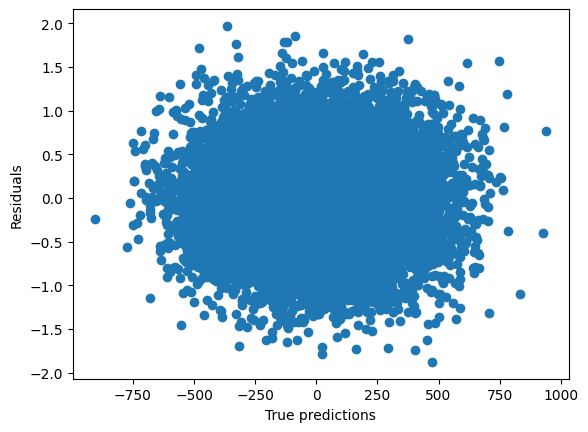

In [4]:
# a. Compute the residuals. Show the mean and variance of the residuals
residuals = y_train - y_train_pred
print("Mean of residuals: ", np.mean(residuals))
print("Variance of residuals: ", np.var(residuals))
print()

# b. Scatter plot of the residuals vs. the true predictions
plt.scatter(y_train_pred, residuals)
plt.xlabel("True predictions")
plt.ylabel("Residuals")
plt.show()


### 5.4 Lasso and Ridge Regression (10 points)

a) Run Lasso and Ridge regression on the data generated in 5.1 by varying the parameter alpha from 10^-3 to 10^3. For each value of the alpha, store the train error (MSE), test error (MSE), and norm of the coefficient vector using [numpy.linalg.norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html).

b) Plot the train error, test error and the norm of the coefficient vector with increasing alpha and note what you observe. Use one plot for train error and test error and another for the norm.


In [5]:
# a. Fit a Lasso and Ridge model on the training set and vary the regularization parameter alpha from 10^-3 to 10^3.

lasso_MSE_train = {}
lasso_MSE_test = {}
lasso_coeff_norm = {}

# Lasso
from sklearn.linear_model import Lasso
alphas = np.logspace(-3, 3, 100)
for alpha in alphas:
    reg = Lasso(alpha=alpha).fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    lasso_MSE_train[alpha] = mean_squared_error(y_train, y_train_pred)
    lasso_MSE_test[alpha] = mean_squared_error(y_test, y_test_pred)
    lasso_coeff_norm[alpha] = np.linalg.norm(reg.coef_)

ridge_MSE_train = {}
ridge_MSE_test = {}
ridge_coeff_norm = {}

# Ridge
from sklearn.linear_model import Ridge
alphas = np.logspace(-3, 3, 100)
for alpha in alphas:
    reg = Ridge(alpha=alpha).fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    ridge_MSE_train[alpha] = mean_squared_error(y_train, y_train_pred)
    ridge_MSE_test[alpha] = mean_squared_error(y_test, y_test_pred)
    ridge_coeff_norm[alpha] = np.linalg.norm(reg.coef_)

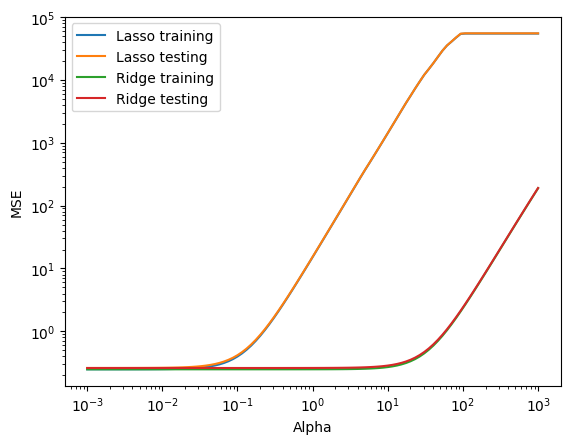

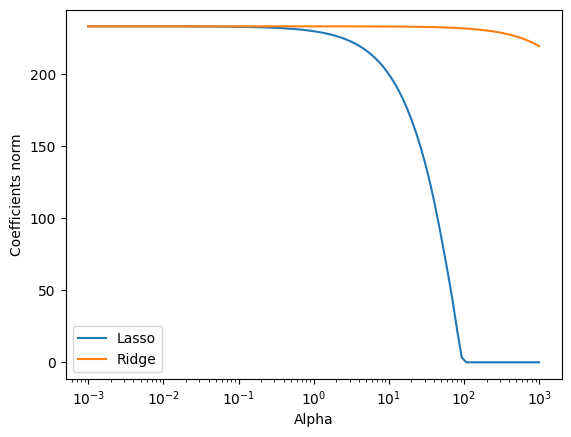

In [6]:
# b. Plot the MSE on the training and testing sets as a function of alpha. One plot for training and test, and one plot for the coefficients norm.
# MSE for training and testing sets
plt.plot(lasso_MSE_train.keys(), lasso_MSE_train.values(), label="Lasso training")
plt.plot(lasso_MSE_test.keys(), lasso_MSE_test.values(), label="Lasso testing")
plt.plot(ridge_MSE_train.keys(), ridge_MSE_train.values(), label="Ridge training")
plt.plot(ridge_MSE_test.keys(), ridge_MSE_test.values(), label="Ridge testing")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

# Coefficients norm
plt.plot(lasso_coeff_norm.keys(), lasso_coeff_norm.values(), label="Lasso")
plt.plot(ridge_coeff_norm.keys(), ridge_coeff_norm.values(), label="Ridge")
plt.xlabel("Alpha")
plt.ylabel("Coefficients norm")
plt.xscale("log")
plt.legend()
plt.show()

### 5.5 Real-world Regression Problem (10 points)

The dataset in the file ecommerce_dataset.csv is for an ecommerce business trying to predict the annual amount spent by each customer. Use Lasso and Ridge regression on the set of independent variables {Average Session Length, Time on App, Time on Website, Length of Membership}  to predict the dependent variable **Yearly Amount Spent**. Vary the value of alpha in the range 10^-6 to 10^5 and do 5-fold cross-validation using sklearn's KFold to find the value of alpha that gives best performance as measured using MSE.

In [15]:
import pandas as pd
data = pd.read_csv("ecommerce_dataset.csv")

In [16]:
data.drop(columns=["Email", "Address", "Avatar"], inplace=True)
data.dropna(inplace=True)

In [23]:
# Import Pipeline, StandardScaler, Lasso and Ridge, train_test_split, mean_squared_error and KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = data.drop(columns=["Yearly Amount Spent"])
y = data["Yearly Amount Spent"]

alphas = np.logspace(-6, 5, 1000)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

ecom_lasso_MSE_train = {}
ecom_lasso_MSE_test = {}
ecom_lasso_coeff_norm = {}

# Lasso
for alpha in alphas:
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("reg", Lasso(alpha=alpha))
    ])
    
    MSE_train = []
    MSE_test = []
    coeff_norm = []

    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        pipe.fit(X_train, y_train)
        y_train_pred = pipe.predict(X_train)
        y_test_pred = pipe.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, y_train_pred))
        MSE_test.append(mean_squared_error(y_test, y_test_pred))
        coeff_norm.append(np.linalg.norm(pipe.named_steps["reg"].coef_))
    
    ecom_lasso_MSE_train[alpha] = np.mean(MSE_train)
    ecom_lasso_MSE_test[alpha] = np.mean(MSE_test)
    ecom_lasso_coeff_norm[alpha] = np.linalg.norm(coeff_norm)

ecom_ridge_MSE_train = {}
ecom_ridge_MSE_test = {}
ecom_ridge_coeff_norm = {}

# Ridge
for alpha in alphas:
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("reg", Ridge(alpha=alpha))
    ])
    
    MSE_train = []
    MSE_test = []
    coeff_norm = []

    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        pipe.fit(X_train, y_train)
        y_train_pred = pipe.predict(X_train)
        y_test_pred = pipe.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, y_train_pred))
        MSE_test.append(mean_squared_error(y_test, y_test_pred))
        coeff_norm.append(np.linalg.norm(pipe.named_steps["reg"].coef_))
    
    ecom_ridge_MSE_train[alpha] = np.mean(MSE_train)
    ecom_ridge_MSE_test[alpha] = np.mean(MSE_test)
    ecom_ridge_coeff_norm[alpha] = np.linalg.norm(coeff_norm)


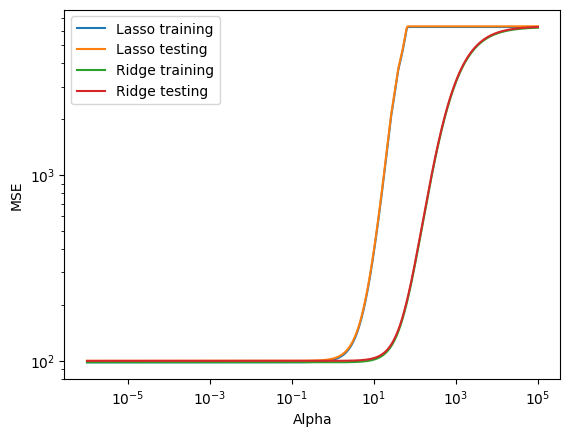

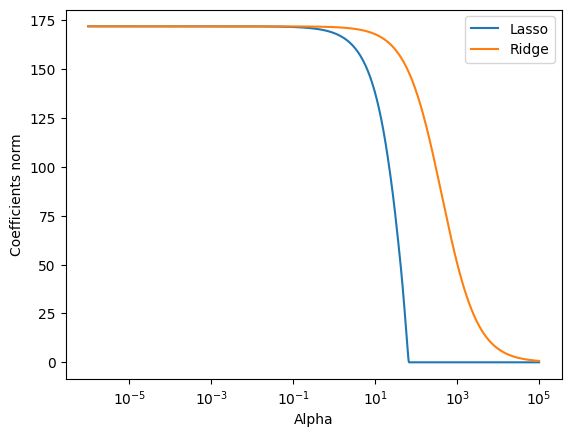

In [24]:
# b. Plot the MSE on the training and testing sets as a function of alpha. One plot for training and test, and one plot for the coefficients norm.
# MSE for training and testing sets
plt.plot(ecom_lasso_MSE_train.keys(), ecom_lasso_MSE_train.values(), label="Lasso training")
plt.plot(ecom_lasso_MSE_test.keys(), ecom_lasso_MSE_test.values(), label="Lasso testing")
plt.plot(ecom_ridge_MSE_train.keys(), ecom_ridge_MSE_train.values(), label="Ridge training")
plt.plot(ecom_ridge_MSE_test.keys(), ecom_ridge_MSE_test.values(), label="Ridge testing")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

# Coefficients norm
plt.plot(ecom_lasso_coeff_norm.keys(), ecom_lasso_coeff_norm.values(), label="Lasso")
plt.plot(ecom_ridge_coeff_norm.keys(), ecom_ridge_coeff_norm.values(), label="Ridge")
plt.xlabel("Alpha")
plt.ylabel("Coefficients norm")
plt.xscale("log")
plt.legend()
plt.show()
